## Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 20 day stock price.

In [2]:
# Import useful libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")



In [3]:
# Get the stock quote
df = web.DataReader("AAPL", data_source="yahoo", start="2020-10-10", end="2021-10-10")
# Show the dataframe
print("shape: ", df.shape)
df

shape:  (251, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-12,125.180000,119.279999,120.059998,124.400002,240226800.0,123.267815
2020-10-13,125.389999,119.650002,125.269997,121.099998,262330500.0,119.997841
2020-10-14,123.029999,119.620003,121.000000,121.190002,150712000.0,120.087029
2020-10-15,121.199997,118.150002,118.720001,120.709999,112559200.0,119.611382
2020-10-16,121.550003,118.809998,121.279999,119.019997,115393800.0,117.936775
...,...,...,...,...,...,...
2021-10-04,142.210007,138.270004,141.759995,139.139999,98322000.0,138.760437
2021-10-05,142.240005,139.360001,139.490005,141.110001,80861100.0,140.725067
2021-10-06,142.149994,138.369995,139.470001,142.000000,83221100.0,141.612640


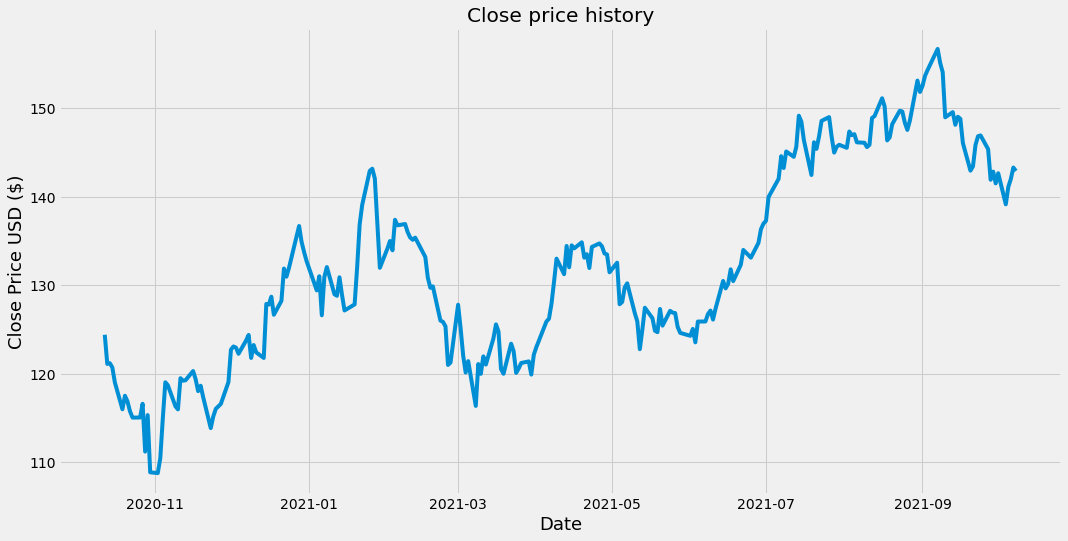

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("Close price history")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column
data = df["Close"]
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

201

In [6]:
# Fit scaler on training data
scaler = MinMaxScaler(feature_range=(0,1)).fit(dataset[:training_data_len].reshape(-1, 1))
# Scale the data
scaled_data = scaler.transform(dataset.reshape(-1, 1))
scaled_data

array([[0.38707296],
       [0.30534925],
       [0.30757817],
       [0.29569102],
       [0.25383855],
       [0.17855392],
       [0.21644393],
       [0.20059452],
       [0.17285795],
       [0.155275  ],
       [0.15552271],
       [0.19390793],
       [0.06017832],
       [0.1622091 ],
       [0.00222892],
       [0.        ],
       [0.04135725],
       [0.15304608],
       [0.25408625],
       [0.24566633],
       [0.18697384],
       [0.17830622],
       [0.26547801],
       [0.25854391],
       [0.25978222],
       [0.28553757],
       [0.26300157],
       [0.22932151],
       [0.24442802],
       [0.21223379],
       [0.12580491],
       [0.15849435],
       [0.17979204],
       [0.19366023],
       [0.25458165],
       [0.34546819],
       [0.35438351],
       [0.35091646],
       [0.33382873],
       [0.37097584],
       [0.38657756],
       [0.32218928],
       [0.35834577],
       [0.33779118],
       [0.32218928],
       [0.47325413],
       [0.47152061],
       [0.493

In [7]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for idx in range(20,training_data_len):
    x_train.append(train_data[idx-20:idx, 0])
    y_train.append(train_data[idx, 0])

In [8]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(181, 20, 1)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[0], x_train.shape[2])))
model.add(LSTM(50, return_sequences=False)) # return_sequences=False because it's the last LSTM layer
model.add(Dense(25))
model.add(Dense(1))

2022-03-18 18:33:31.239802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-18 18:33:31.239827: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-18 18:33:31.239846: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lenovo): /proc/driver/nvidia/version does not exist
2022-03-18 18:33:31.240110: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-03-18 18:33:36.170848: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


181/181 [==============================] - 3s 6ms/step - loss: 0.0205


In [11]:
training_data_len

201

In [12]:
# Create the testing data set

# Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 20:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:]
for idx in range(20, len(test_data)):
    x_test.append(test_data[idx-20:idx, 0])

In [13]:
# Corvert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [15]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( (predictions-y_test)**2 ) ) # type: ignore
rmse

5.059727332977036

/tmp/ipykernel_9941/3569155130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


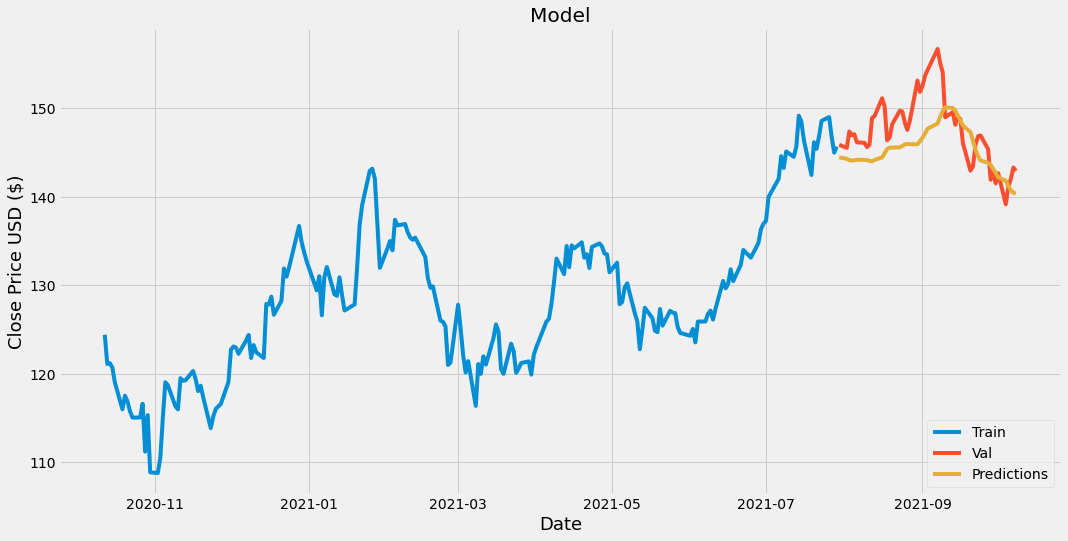

In [16]:
# Plot the data
data = pd.DataFrame(data)
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [17]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-07-30,145.860001,144.431915
2021-08-02,145.520004,144.280792
2021-08-03,147.360001,144.108719
2021-08-04,146.949997,144.087463
2021-08-05,147.059998,144.110977
2021-08-06,146.139999,144.161301
2021-08-09,146.089996,144.162247
2021-08-10,145.600006,144.131104
2021-08-11,145.860001,144.050476
